In [1]:
#setup toolkit
import pandas as pd
from pandas import Series, DataFrame

#import data
raw_data = pd.read_csv("/home/ingmar/Desktop/Data/HR-Employee-Attrition.csv")
df = pd.DataFrame(raw_data)

#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [2]:
print(df.describe(include='all'))

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

In [3]:
#replace first column

In [4]:
first_column = df.pop('Attrition')

In [5]:
df.insert(0, 'Attrition', first_column)

In [6]:
#inspect variables

In [7]:
df['JobRole'].value_counts().count()

9

In [8]:
df['EmployeeCount'].value_counts().count()

1

In [9]:
df['EmployeeNumber'].value_counts().count()

1470

In [10]:
df.pop('EmployeeCount')
df.pop('EmployeeNumber')
df.pop('JobRole')
df.pop('Over18')
df.pop('StandardHours')

0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [11]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [12]:
#replace values for evaluation

In [13]:
df.Attrition.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

In [14]:
#get unique values in a feature

In [15]:
print (df['OverTime'].unique())

['Yes' 'No']


In [16]:
df.Gender.replace(to_replace=['Female', 'Male'], value=[0, 1],inplace=True)

In [17]:
df.BusinessTravel.replace(to_replace=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], value=[0,1,2],inplace=True)

In [18]:
df.EducationField.replace(to_replace=['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree',
 'Human Resources'], value=[0,1,2,3,4,5],inplace=True)

In [19]:
df.MaritalStatus.replace(to_replace=['Single', 'Married', 'Divorced'], value=[0,1,2],inplace=True)

In [20]:
df.Department.replace(to_replace=['Sales', 'Research & Development', 'Human Resources'], value=[0,1,2],inplace=True)

In [21]:
df.OverTime.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

In [22]:
#make the correlation matrix

In [23]:
corrMatrix = df.corr()
print (corrMatrix)

                          Attrition       Age  BusinessTravel  DailyRate  \
Attrition                  1.000000 -0.159205        0.127006  -0.056652   
Age                       -0.159205  1.000000       -0.011807   0.010661   
BusinessTravel             0.127006 -0.011807        1.000000  -0.015539   
DailyRate                 -0.056652  0.010661       -0.015539   1.000000   
Department                -0.063991  0.031882        0.002640  -0.007109   
DistanceFromHome           0.077924 -0.001686       -0.009696  -0.004985   
Education                 -0.031373  0.208034       -0.008670  -0.016806   
EducationField             0.075437 -0.007192       -0.021217  -0.015942   
EnvironmentSatisfaction   -0.103369  0.010146       -0.011310   0.018355   
Gender                     0.029453 -0.036311       -0.044896  -0.011716   
HourlyRate                -0.006846  0.024287       -0.004164   0.023381   
JobInvolvement            -0.130016  0.029820        0.029300   0.046135   
JobLevel    

In [24]:
#Print only half as it looks better
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True

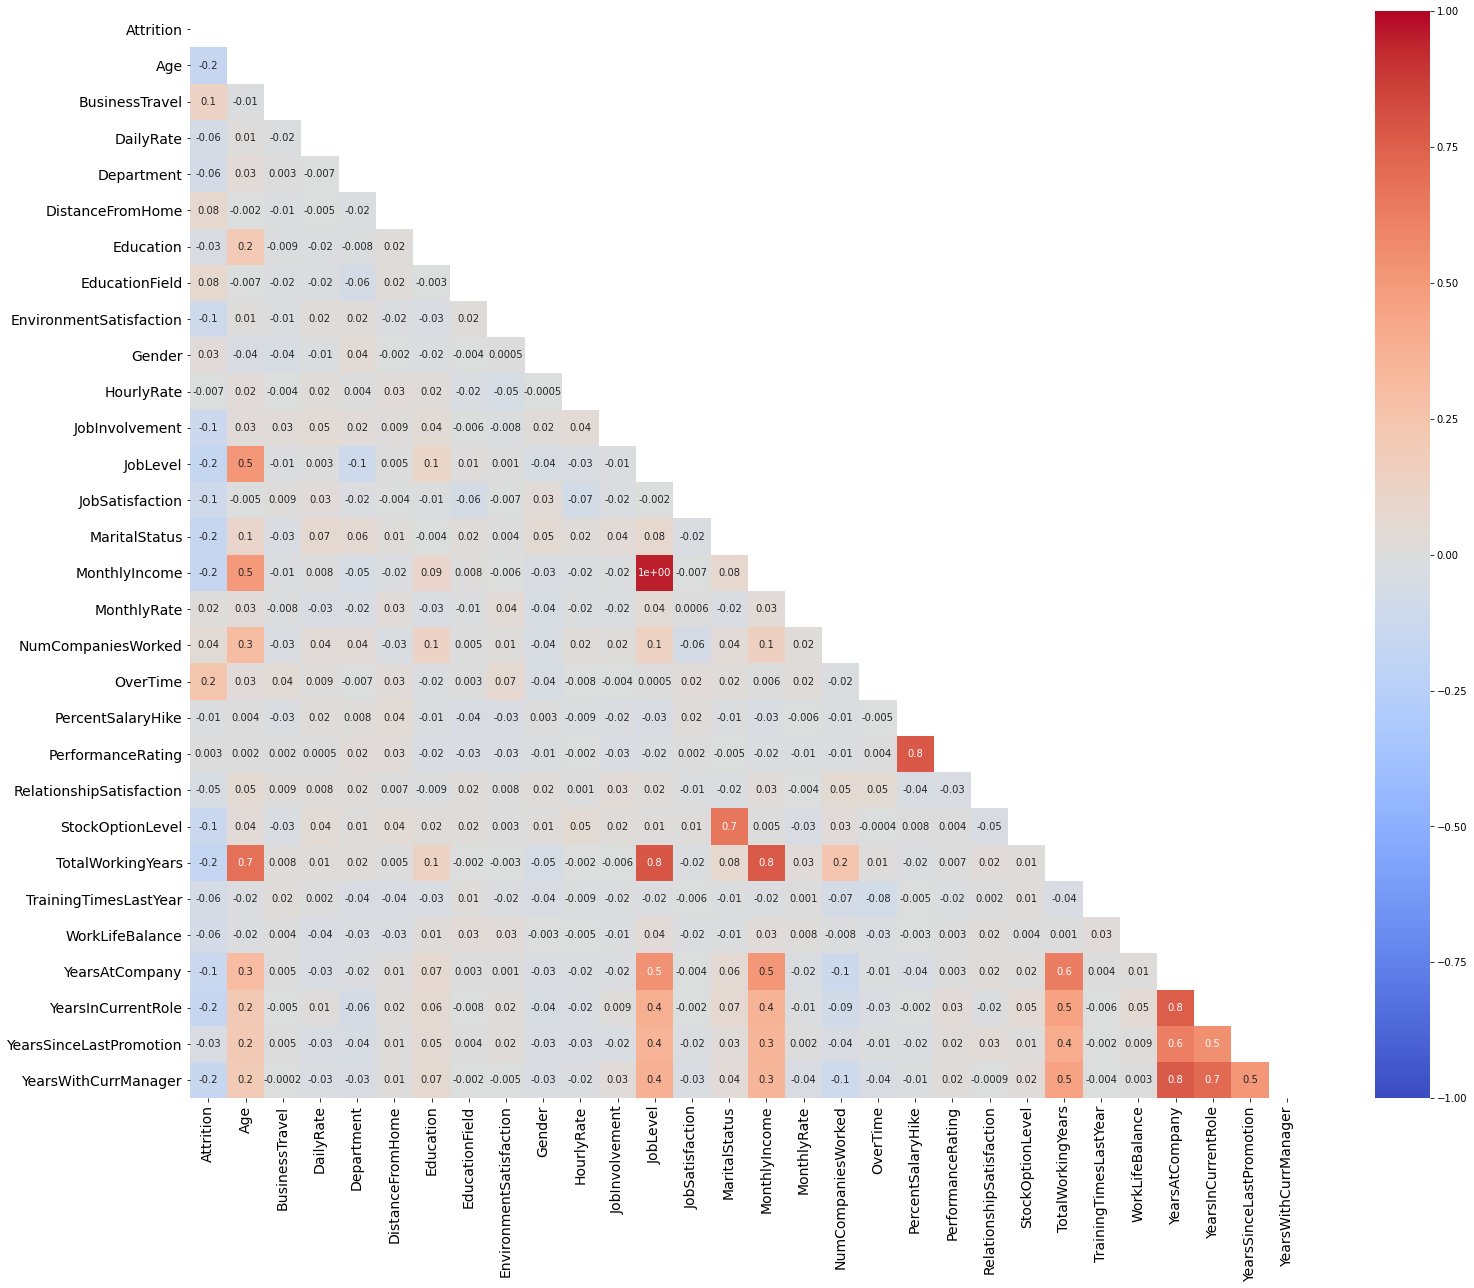

<Figure size 432x288 with 0 Axes>

In [25]:
sns.heatmap(corrMatrix, mask = mask, annot=True, vmin = -1, vmax = 1, center =0, fmt='.1', cmap = 'coolwarm', xticklabels = True, yticklabels = True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig = plt.gcf()
fig.set_size_inches(25, 20)
plt.show()
plt.savefig('our_plot_name.jpg', format='jpeg', dpi=70)

In [26]:
#make copy for logistical regression

In [27]:
df_lr =df.copy()

In [28]:
df_lr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2


In [29]:
#turn back to labels for readability with dummies

In [30]:
df.Gender.replace(to_replace=[0, 1], value=['Female', 'Male'],inplace=True)

In [31]:
df.BusinessTravel.replace(to_replace=[0, 1, 2], value=['Non-Travel','Travel_Rarely','Travel_Frequently'],inplace=True)

In [32]:
df.EducationField.replace(to_replace=[0,1,2,3,4,5], value=['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree',
 'Human Resources'],inplace=True)

In [33]:
df.MaritalStatus.replace(to_replace=[0,1,2], value=['Single', 'Married', 'Divorced'],inplace=True)

In [34]:
df.Department.replace(to_replace=[0,1,2], value=['Sales', 'Research & Development', 'Human Resources'],inplace=True)

In [35]:
df.OverTime.replace(to_replace=[0,1], value=['No', 'Yes'],inplace=True)

In [36]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [37]:
#One-hot-encoding for this data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df=df.copy()

In [38]:
df = pd.concat([df,pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')],axis=1)

In [39]:
df = pd.concat([df,pd.get_dummies(df['Department'], prefix='Department')],axis=1)

In [40]:
df = pd.concat([df,pd.get_dummies(df['EducationField'], prefix='EducationField')],axis=1)

In [41]:
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix='Gender')],axis=1)

In [42]:
df = pd.concat([df,pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')],axis=1)

In [43]:
df = pd.concat([df,pd.get_dummies(df['OverTime'], prefix='OverTime')],axis=1)

In [44]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,0,0,1,0,0,0,1,0,1
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,0,0,0,0,1,0,1,0,1,0
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,1,0,0,1,0,0,1,0,1
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,0,0,1,0,0,1,0,0,1
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,0,0,0,1,0,1,0,1,0


In [45]:
#delete original variables

In [46]:
df.pop('BusinessTravel')
df.pop('Department')
df.pop('EducationField')
df.pop('Gender')
df.pop('MaritalStatus')
df.pop('OverTime')

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

In [47]:
#print the df to a csv
#df.to_csv('test.csv')
#pwd

Start analysis

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

In [49]:
#make reports

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp 
from sklearn import metrics

In [51]:
#calculate base rate
Baserate = round((sum(df.Attrition == 0)/len(df.Attrition)*100),2)
print(f"The baserate = {Baserate}%")

The baserate = 83.88%


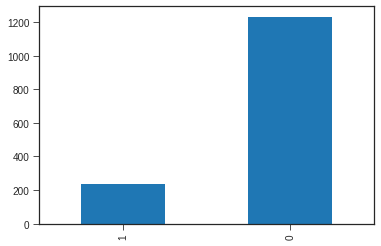

In [52]:
#plot attrition
import matplotlib.pyplot as plt 
import matplotlib as mpl
from cycler import cycler
plt.style.use('seaborn-ticks')
data = np.random.randn(50)
ax = df['Attrition'].value_counts().sort_values().plot(kind="bar")
ax.labelsize : 24
totals= []
plt.show()

In [53]:
#build model
from sklearn.model_selection import train_test_split 

#exctract feature variables
X_variables = df.drop('Attrition', axis=1)

#extract target variable
y_variable = df['Attrition']

#get training and test data
X_train, X_test, y_train, y_test = train_test_split(X_variables, y_variable, test_size=0.30, random_state=42 )

In [54]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

#create MinMaxScaler object
scaler_min_max = MinMaxScaler()

#fit object to data
scaler_min_max.fit(X_train)

#get transformed train data
X_train_normalized = scaler_min_max.transform(X_train)

#get transformed test data
X_test_normalized = scaler_min_max.transform(X_test)

In [55]:
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,41,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,0,49,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,1,0,1,0
2,1,37,1373,2,2,4,92,2,1,3,...,0,1,0,0,1,0,0,1,0,1
3,0,33,1392,3,4,4,56,3,1,3,...,0,0,0,1,0,0,1,0,0,1
4,0,27,591,2,1,1,40,3,1,2,...,1,0,0,0,1,0,1,0,1,0


In [56]:
#Logistic regression

In [57]:
#make model for LR

In [58]:
df_lr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2


In [59]:
from sklearn.model_selection import train_test_split 

#exctract feature variables
X_variables_lr = df_lr.drop('Attrition', axis=1)

#extract target variable
y_variable_lr = df_lr['Attrition']

#get training and test data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_variables_lr, y_variable_lr, test_size=0.30, random_state=42 )

In [60]:
#feature scaling for LR
from sklearn.preprocessing import MinMaxScaler

#create MinMaxScaler object
lr_scaler_min_max = MinMaxScaler()

#fit object to data
lr_scaler_min_max.fit(X_train_lr)

#get transformed train data
X_train_lr_normalized = lr_scaler_min_max.transform(X_train_lr)

#get transformed test data
X_test_lr_normalized = lr_scaler_min_max.transform(X_test_lr)

In [61]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=42).fit(X_train_lr_normalized, y_train_lr)
lr_clf.predict(X_test_lr_normalized)
lr_clf.predict_proba(X_test_lr_normalized)
lr_clf.score(X_test_lr_normalized, y_test_lr)
lr_pred = lr_clf.predict(X_test_lr_normalized)
#Accuracy
print("LR Accuracy:", round(metrics.accuracy_score(y_test_lr, lr_pred),4))
print()
#classifiaction report
print('LR Classification Report:')
print(metrics.classification_report(y_test_lr, lr_pred))

LR Accuracy: 0.8776

LR Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.63      0.28      0.39        61

    accuracy                           0.88       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.86      0.88      0.86       441



In [62]:
#Confusion Matrix plot

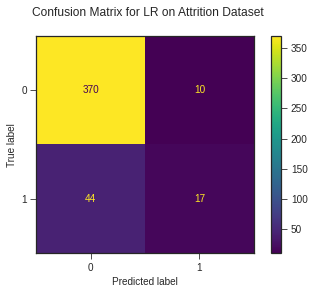

In [63]:
fig=plot_confusion_matrix(lr_clf, X_test_lr_normalized, y_test_lr,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for LR on Attrition Dataset")
plt.show()

0.5892364106988782


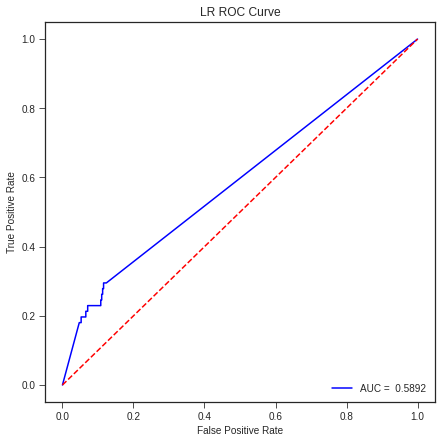

In [64]:
# get probabilities of class membership of test instances
probs_lr = lr_clf.predict_proba(X_test_lr)

#get col with probabilities
y_pred_proba = probs_lr[:,1]

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = metrics.roc_curve(y_test_lr, y_pred_proba)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#define figure size 
plt.figure(figsize=(7,7))

#add title
plt.title('LR ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'AUC =  ' + str(round(roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
#KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

In [67]:
#original run

In [68]:
#find K-Nearest neighbors

In [69]:
#create KNeighborsClassifier object
knn_clf = KNeighborsClassifier(n_neighbors=10)  

#fit object to data
knn_model = knn_clf.fit(X_train_normalized, y_train)
train_preds = knn_model.predict(X_train_normalized)

In [70]:
#get predictions
knn_y_pred = knn_clf.predict(X_test_normalized)

In [71]:
#Accuracy
print("KNN Accuracy:",round(metrics.accuracy_score(y_test, knn_y_pred),4))
print()
#classifiaction report
print('KNN Classification Report:')
print(metrics.classification_report(y_test, knn_y_pred))

KNN Accuracy: 0.8571

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.42      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.64      0.53      0.53       441
weighted avg       0.81      0.86      0.81       441



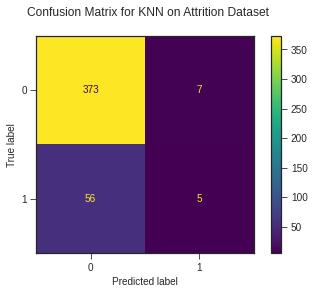

In [72]:
fig=plot_confusion_matrix(knn_clf, X_test_normalized, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for KNN on Attrition Dataset")
plt.show()

0.6638265746333045


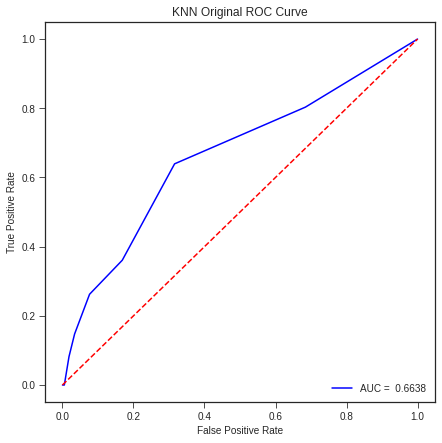

In [73]:
# get probabilities of class membership of test instances
probs_knn1 = knn_clf.predict_proba(X_test_normalized) #which clf?

#get col with probabilities
y_pred_proba = probs_knn1[:,1]

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#define figure size 
plt.figure(figsize=(7,7))

#add title
plt.title('KNN Original ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'AUC =  ' + str(round(roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train_normalized, y_train)
GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})
gridsearch.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [75]:
train_preds_grid = gridsearch.predict(X_train_normalized)
test_preds_grid = gridsearch.predict(X_test_normalized)

In [76]:
#create new KNeighborsClassifier object
knn2_clf = KNeighborsClassifier(n_neighbors=15)
knn2_clf.fit(X_train_normalized, y_train)
#get improved predictions
knn2_y_pred = knn2_clf.predict(X_test_normalized)

In [77]:
#Accuracy
print("New KNN Accuracy:", round(metrics.accuracy_score(y_test, knn2_y_pred),4))
print()
#classifiaction report
print('New KNN Classification Report:')
print(metrics.classification_report(y_test, knn2_y_pred))

New KNN Accuracy: 0.8685

New KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.64      0.11      0.19        61

    accuracy                           0.87       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.84      0.87      0.83       441



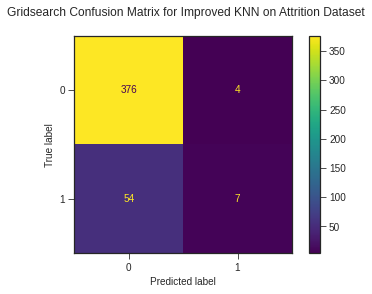

In [78]:
fig=plot_confusion_matrix(knn2_clf, X_test_normalized, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Gridsearch Confusion Matrix for Improved KNN on Attrition Dataset")
plt.show()

In [79]:
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train_normalized, y_train)
GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})
gridsearch.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [80]:
#create KNeighborsClassifier object with bagging
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)

In [81]:
from sklearn.ensemble import BaggingClassifier
knn_bagging_model = BaggingClassifier(bagged_knn, n_estimators=100)

In [82]:
knn3_clf = knn_bagging_model.fit(X_train_normalized, y_train)
knn3_y_pred = knn3_clf.predict(X_test_normalized)

In [83]:
#Accuracy
print("New KNN Accuracy:", round(metrics.accuracy_score(y_test, knn3_y_pred),4))
print()
#classifiaction report
print('New KNN Classification Report:')
print(metrics.classification_report(y_test, knn3_y_pred))

New KNN Accuracy: 0.8662

New KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441



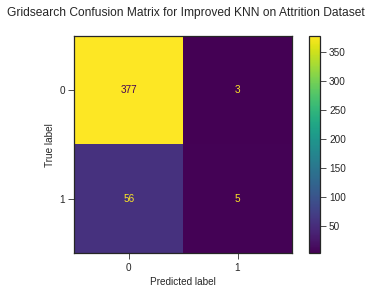

In [84]:
fig=plot_confusion_matrix(knn3_clf, X_test_normalized, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Gridsearch Confusion Matrix for Improved KNN on Attrition Dataset")
plt.show()

0.670772217428818


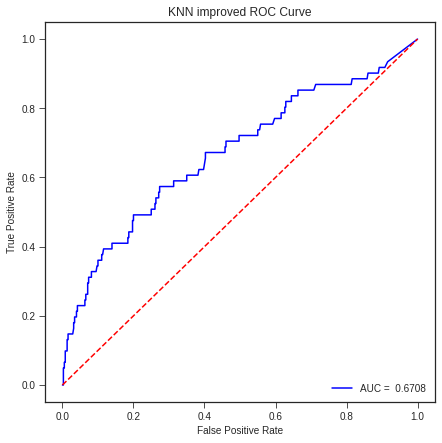

In [85]:
# get probabilities of class membership of test instances
probs_knn_bagged = knn3_clf.predict_proba(X_test_normalized) #which clf?

#get col with probabilities
y_pred_proba = probs_knn_bagged[:,1]

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#define figure size 
plt.figure(figsize=(7,7))

#add title
plt.title('KNN improved ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'AUC =  ' + str(round(roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
#Decision Tree

In [87]:
from sklearn import tree
X, y = X_train_normalized, y_train
dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X, y)
dt_clf = tree.DecisionTreeClassifier(random_state=42, max_depth=5)
dt_clf = dt_clf.fit(X_train_normalized, y_train)
dt_clf_pred = dt_clf.predict(X_test_normalized)
y_probas_decision_tree=cross_val_predict(dt_clf, X_train_normalized, y_train, method='predict_proba')
y_scores_decision_tree = y_probas_decision_tree[:,1] #score = probability in the positive category
fpr, tpr, threshold=roc_curve(y_train, y_scores_decision_tree)
#Accuracy
print("Decision Tree Accuracy:", round(metrics.accuracy_score(y_test, dt_clf_pred),4))
print()
#classification report
print('Decision Tree Classification Report')
print(metrics.classification_report(y_test, dt_clf_pred))

Decision Tree Accuracy: 0.8458

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       380
           1       0.39      0.20      0.26        61

    accuracy                           0.85       441
   macro avg       0.63      0.57      0.59       441
weighted avg       0.81      0.85      0.82       441



In [88]:
#Print decision tree confusion matrix

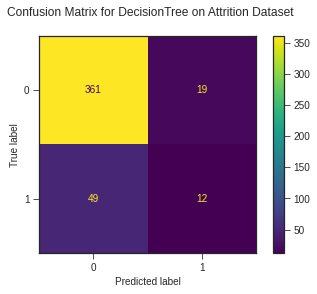

In [89]:
fig=plot_confusion_matrix(dt_clf, X_test_normalized, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for DecisionTree on Attrition Dataset")
plt.show()

0.6326143226919758


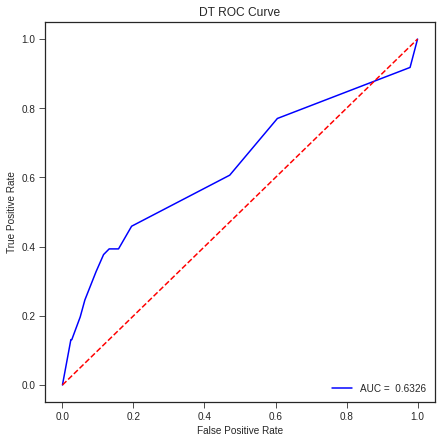

In [90]:
# get probabilities of class membership of test instances
probs_dt = dt_clf.predict_proba(X_test_normalized) #which clf?

#get col with probabilities
y_pred_proba = probs_dt[:,1]

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#define figure size 
plt.figure(figsize=(7,7))

#add title
plt.title('DT ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'AUC =  ' + str(round(roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
#improve accuracy

In [92]:
from sklearn.model_selection import KFold, cross_val_score

#k_fold object
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

#scores reached with different splits of training/test data 
k_fold_scores = cross_val_score(dt_clf, X_variables, y_variable, cv=k_fold, n_jobs=1)

#arithmetic mean of accuracy scores 
mean_accuracy = np.mean(k_fold_scores)

print("K-Fold score:", round(mean_accuracy, 4))

K-Fold score: 0.8361


In [93]:
from sklearn.model_selection import GridSearchCV

#tree parameters which shall be tested
tree_para = {'criterion':['gini','entropy'],'max_depth':[i for i in range(1,20)], 'min_samples_split':[i for i in range (2,20)]}

#GridSearchCV object
dt_grd_clf = GridSearchCV(dt_clf, tree_para, cv=5)

#creates different trees with all the differnet parameters out of our data
dt_grd_clf.fit(X_variables, y_variable)

#best parameters that were found
best_parameters = dt_grd_clf.best_params_  
print(best_parameters)  

#new tree object with best parameters
model_with_best_tree_parameters = dt_grd_clf.best_estimator_

#k_fold object
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#scores reached with different splits of training/test data 
k_fold_scores = cross_val_score(model_with_best_tree_parameters, X_variables, y_variable, cv=k_fold, n_jobs=1)

#arithmetic mean of accuracy scores 
mean_accuracy_best_parameters_tree = np.mean(k_fold_scores)

print('Accuracy:',(round(mean_accuracy_best_parameters_tree, 4)))

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.8422


In [94]:
#Print decision tree

In [95]:
from sklearn.tree import export_graphviz

tree.export_graphviz(model_with_best_tree_parameters, out_file="mytree.dot", feature_names = df.columns[1:], class_names= ['No','Yes'] ) 

#feature_names =  feature_names = df.columns 
#Export as dot file
#export_graphviz(decision_tree, out_file='attrition_tree.dot', class_names = ['0','1'])

#Export dot to png 
from subprocess import check_call
check_call(['dot','-Tpng','mytree.dot','-o','mytree.png'])

0

In [96]:
#Random Forest Classifier

In [97]:
#Original Run

In [98]:
from sklearn.ensemble import RandomForestClassifier
from itertools import cycle
#build random forest classifier
rfc_clf = RandomForestClassifier(n_estimators=120)
rfc_clf.fit(X_train_normalized, y_train)

rfc_pred = rfc_clf.predict(X_test_normalized)

y_probas_forest=cross_val_predict(rfc_clf, X_train_normalized, y_train, method='predict_proba')
y_scores_forest = y_probas_forest[:,1] #score = probability in the positive category
fpr, tpr, threshold=roc_curve(y_train, y_scores_forest)
#Accuracy
print("RFC Accuracy:", round(metrics.accuracy_score(y_test, rfc_pred),4))
print()
#classifiaction report
print('RFC Classification Report:')
print(metrics.classification_report(y_test, rfc_pred))

RFC Accuracy: 0.8662

RFC Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441



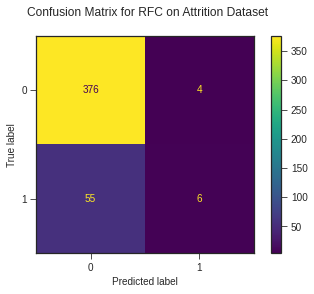

In [99]:
fig=plot_confusion_matrix(rfc_clf, X_test_normalized, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for RFC on Attrition Dataset")
plt.show()

In [100]:
#K-fold

In [101]:
#k_fold object
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#scores reached with different splits of training/test data 
k_fold_scores = cross_val_score(rfc_clf, X_variables, y_variable, cv=k_fold, n_jobs=1)

#arithmetic mean of accuracy scores 
mean_accuracy = np.mean(k_fold_scores)

print("K-Fold score:", round(mean_accuracy, 4))

K-Fold score: 0.8599


In [102]:
from sklearn.model_selection import GridSearchCV

#tree parameters which shall be tested
rfc_para = {'criterion':['gini','entropy'],'max_depth':[i for i in range(1,20)], 'min_samples_split':[i for i in range (2,20)]}

#GridSearchCV object
rfc_grd_clf = GridSearchCV(rfc_clf, rfc_para, cv=5)

#creates different trees with all the different parameters out of our data
rfc_grd_clf.fit(X_variables, y_variable)

#best parameters that were found
best_parameters = rfc_grd_clf.best_params_  
print(best_parameters)  

#new rfc object with best parameters
model_with_best_rfc_parameters = rfc_grd_clf.best_estimator_

#k_fold object
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#scores reached with different splits of training/test data 
k_fold_scores = cross_val_score(model_with_best_rfc_parameters, X_variables, y_variable, cv=k_fold, n_jobs=1)

#arithmetic mean of accuracy scores 
mean_accuracy_with_best_parameters_rfc = np.mean(k_fold_scores)

{'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 6}


In [124]:
model_with_best_rfc_parameters = rfc_clf.predict(X_test_normalized)
rfc_grd_clf.fit(X_train_normalized, y_train)

rfc_best_y_probas = cross_val_predict(rfc_grd_clf, X_train_normalized, y_train, method='predict_proba')
rfc_best_y_scores = rfc_best_y_probas[:,1] #score = probability in the positive category
fpr, tpr, threshold=roc_curve(y_train, y_scores_forest)

#Accuracy
print("RFC Accuracy:", round(metrics.accuracy_score(y_test, rfc_pred),4))
print()
#classifiaction report
print('RFC Classification Report:')
print(metrics.classification_report(y_test, rfc_pred))

KeyboardInterrupt: 

0.7836496980155306


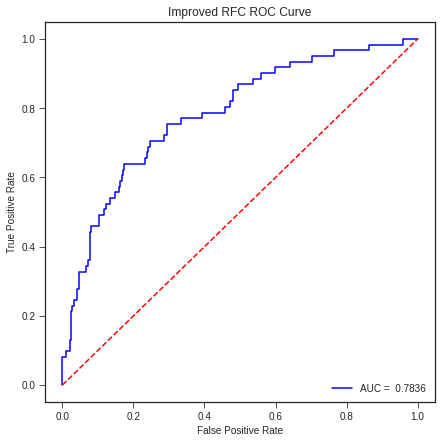

In [111]:
# get probabilities of class membership of test instances
probs_rfc = rfc_grd_clf.predict_proba(X_test_normalized) #which clf?

#get col with probabilities
y_pred_proba = probs_rfc[:,1]

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#define figure size 
plt.figure(figsize=(7,7))

#add title
plt.title('Improved RFC ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'AUC =  ' + str(round(roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [112]:
#SVM

In [106]:
# instantiate SVC object. Probability parameter needed for ROC-Curve in the next step
s = SVC(probability = True)

# define parameters for the GridSearchCV: try different kernels, different C values and for 'poly','sigmoid' and 'rbf'kernes different gamma vlaues
parameters = {'kernel':('linear', 'poly','sigmoid','rbf'), 'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],'gamma': (1,2,3,'auto')}

# instantiate GridSearchCV object with its parameters 
svm_clf = GridSearchCV(s, parameters, cv=5)

# train models
svm_clf.fit(X_train_normalized, y_train)

#check which model performed best 
svm_clf.best_params_

{'C': 0.9, 'gamma': 1, 'kernel': 'linear'}

In [109]:
# instantiate new object with best parameters for our data
best_params_svm = SVC(kernel='linear', gamma = 1, probability = True, C = 0.9)
best_params_svm.fit(X_train_normalized, y_train)

# get predictions
svm_new_y_pred = best_params_svm.predict(X_test_normalized)
svm_new_y_probas=cross_val_predict(best_params_svm, X_train_normalized, y_train, method='predict_proba')
svm_new_y_scores = svm_new_y_probas[:,1] #score = probability in the positive category
fpr, tpr, threshold=roc_curve(y_train, svm_new_y_scores)

#Accuracy
print("SVM Accuracy:", round(metrics.accuracy_score(y_test, svm_new_y_pred),4))
print()
#classifiaction report
print('SVM Classification Report:')
print(metrics.classification_report(y_test, svm_new_y_pred))

SVM Accuracy: 0.8934

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       380
           1       0.82      0.30      0.43        61

    accuracy                           0.89       441
   macro avg       0.86      0.64      0.69       441
weighted avg       0.89      0.89      0.87       441



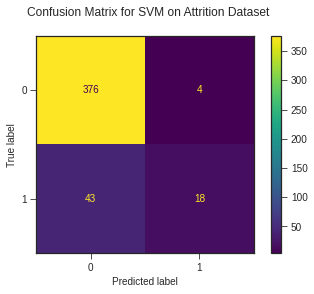

In [113]:
fig=plot_confusion_matrix(best_params_svm, X_test_normalized, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for SVM on Attrition Dataset")
plt.show()

0.8106125970664366


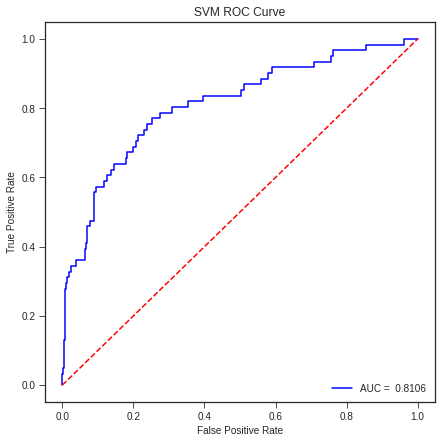

In [114]:
# get probabilities of class membership of test instances
probs_svm = best_params_svm.predict_proba(X_test_normalized) #which clf?

#get col with probabilities
y_pred_proba = probs_svm[:,1]

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#define figure size 
plt.figure(figsize=(7,7))

#add title
plt.title('SVM ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'AUC =  ' + str(round(roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [116]:
#MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(100), activation= 'relu', max_iter=575, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=.01)

mlp_clf.fit(X_train_normalized, y_train)
mlp_clf_pred = mlp_clf.predict(X_test_normalized)

mlp_clf_y_probas=cross_val_predict(mlp_clf, X_train_normalized, y_train, method='predict_proba')
mlp_clf_y_scores = mlp_clf_y_probas[:,1] #score = probability in the positive category
fpr, tpr, threshold=roc_curve(y_train, y_scores_forest)

print("Training set score: %f" % mlp_clf.score(X_train_normalized, y_train))
print("Test set score: %f" % mlp_clf.score(X_test_normalized, y_test))
print()

#Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, mlp_clf_pred),4))
print()

#Classification Report
print("Classification Report:")
print(metrics.classification_report(y_test, mlp_clf_pred))

Iteration 1, loss = 0.58482607
Iteration 2, loss = 0.47035210
Iteration 3, loss = 0.43076422
Iteration 4, loss = 0.43081989
Iteration 5, loss = 0.42542448
Iteration 6, loss = 0.41455214
Iteration 7, loss = 0.40631983
Iteration 8, loss = 0.40096626
Iteration 9, loss = 0.39603104
Iteration 10, loss = 0.39150298
Iteration 11, loss = 0.38706441
Iteration 12, loss = 0.38302357
Iteration 13, loss = 0.37959038
Iteration 14, loss = 0.37585618
Iteration 15, loss = 0.37275991
Iteration 16, loss = 0.36973146
Iteration 17, loss = 0.36714349
Iteration 18, loss = 0.36475752
Iteration 19, loss = 0.36300464
Iteration 20, loss = 0.36127304
Iteration 21, loss = 0.35952880
Iteration 22, loss = 0.35737547
Iteration 23, loss = 0.35512718
Iteration 24, loss = 0.35333950
Iteration 25, loss = 0.35247649
Iteration 26, loss = 0.35090803
Iteration 27, loss = 0.34922699
Iteration 28, loss = 0.34771895
Iteration 29, loss = 0.34658816
Iteration 30, loss = 0.34548071
Iteration 31, loss = 0.34401398
Iteration 32, los

Iteration 259, loss = 0.26636820
Iteration 260, loss = 0.26591032
Iteration 261, loss = 0.26593017
Iteration 262, loss = 0.26620681
Iteration 263, loss = 0.26566939
Iteration 264, loss = 0.26492652
Iteration 265, loss = 0.26520641
Iteration 266, loss = 0.26454833
Iteration 267, loss = 0.26531592
Iteration 268, loss = 0.26464488
Iteration 269, loss = 0.26384575
Iteration 270, loss = 0.26419755
Iteration 271, loss = 0.26410563
Iteration 272, loss = 0.26377650
Iteration 273, loss = 0.26338445
Iteration 274, loss = 0.26370098
Iteration 275, loss = 0.26272543
Iteration 276, loss = 0.26209157
Iteration 277, loss = 0.26231713
Iteration 278, loss = 0.26196459
Iteration 279, loss = 0.26143569
Iteration 280, loss = 0.26110826
Iteration 281, loss = 0.26134164
Iteration 282, loss = 0.26071177
Iteration 283, loss = 0.26079143
Iteration 284, loss = 0.26014290
Iteration 285, loss = 0.25980308
Iteration 286, loss = 0.25981367
Iteration 287, loss = 0.25930425
Iteration 288, loss = 0.25949465
Iteration 

Iteration 519, loss = 0.20010769
Iteration 520, loss = 0.19945930
Iteration 521, loss = 0.19960591
Iteration 522, loss = 0.19910702
Iteration 523, loss = 0.19909432
Iteration 524, loss = 0.19908240
Iteration 525, loss = 0.19905493
Iteration 526, loss = 0.19842730
Iteration 527, loss = 0.20047475
Iteration 528, loss = 0.19875901
Iteration 529, loss = 0.19819901
Iteration 530, loss = 0.19748298
Iteration 531, loss = 0.19715808
Iteration 532, loss = 0.19683238
Iteration 533, loss = 0.19834187
Iteration 534, loss = 0.19678602
Iteration 535, loss = 0.19654280
Iteration 536, loss = 0.19828962
Iteration 537, loss = 0.19624245
Iteration 538, loss = 0.19519057
Iteration 539, loss = 0.19474321
Iteration 540, loss = 0.19599516
Iteration 541, loss = 0.19418578
Iteration 542, loss = 0.19539210
Iteration 543, loss = 0.19474715
Iteration 544, loss = 0.19384883
Iteration 545, loss = 0.19360155
Iteration 546, loss = 0.19430554
Iteration 547, loss = 0.19354828
Iteration 548, loss = 0.19360138
Iteration 

/home/ingmar/01_Python/Ingmar_Projects/Titanic/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.34549746
Iteration 33, loss = 0.34477790
Iteration 34, loss = 0.34376277
Iteration 35, loss = 0.34240067
Iteration 36, loss = 0.34101092
Iteration 37, loss = 0.33992968
Iteration 38, loss = 0.33895901
Iteration 39, loss = 0.33791830
Iteration 40, loss = 0.33694951
Iteration 41, loss = 0.33594368
Iteration 42, loss = 0.33505876
Iteration 43, loss = 0.33391281
Iteration 44, loss = 0.33308802
Iteration 45, loss = 0.33250537
Iteration 46, loss = 0.33151145
Iteration 47, loss = 0.33055616
Iteration 48, loss = 0.32964119
Iteration 49, loss = 0.32854721
Iteration 50, loss = 0.32879101
Iteration 51, loss = 0.32791370
Iteration 52, loss = 0.32644802
Iteration 53, loss = 0.32598217
Iteration 54, loss = 0.32719569
Iteration 55, loss = 0.32569723
Iteration 56, loss = 0.32336234
Iteration 57, loss = 0.32271841
Iteration 58, loss = 0.32213415
Iteration 59, loss = 0.32152049
Iteration 60, loss = 0.32076352
Iteration 61, loss = 0.31999039
Iteration 62, loss = 0.31937069
Iteratio

Iteration 324, loss = 0.24303537
Iteration 325, loss = 0.24263032
Iteration 326, loss = 0.24240324
Iteration 327, loss = 0.24180208
Iteration 328, loss = 0.24245082
Iteration 329, loss = 0.24180240
Iteration 330, loss = 0.24283071
Iteration 331, loss = 0.24095750
Iteration 332, loss = 0.24086356
Iteration 333, loss = 0.24002509
Iteration 334, loss = 0.24081748
Iteration 335, loss = 0.24173910
Iteration 336, loss = 0.23979666
Iteration 337, loss = 0.23920157
Iteration 338, loss = 0.23924325
Iteration 339, loss = 0.23953183
Iteration 340, loss = 0.23954047
Iteration 341, loss = 0.23920765
Iteration 342, loss = 0.23870153
Iteration 343, loss = 0.23814998
Iteration 344, loss = 0.23758803
Iteration 345, loss = 0.23802602
Iteration 346, loss = 0.23803595
Iteration 347, loss = 0.23688653
Iteration 348, loss = 0.23686769
Iteration 349, loss = 0.23741964
Iteration 350, loss = 0.23598975
Iteration 351, loss = 0.23620222
Iteration 352, loss = 0.23953476
Iteration 353, loss = 0.23692676
Iteration 

/home/ingmar/01_Python/Ingmar_Projects/Titanic/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.33624812
Iteration 52, loss = 0.33498575
Iteration 53, loss = 0.33465652
Iteration 54, loss = 0.33451144
Iteration 55, loss = 0.33350149
Iteration 56, loss = 0.33257207
Iteration 57, loss = 0.33210486
Iteration 58, loss = 0.33186713
Iteration 59, loss = 0.33129941
Iteration 60, loss = 0.32999939
Iteration 61, loss = 0.32891000
Iteration 62, loss = 0.32924383
Iteration 63, loss = 0.33033462
Iteration 64, loss = 0.33330932
Iteration 65, loss = 0.33062302
Iteration 66, loss = 0.32657234
Iteration 67, loss = 0.32610689
Iteration 68, loss = 0.32614814
Iteration 69, loss = 0.32484053
Iteration 70, loss = 0.32430082
Iteration 71, loss = 0.32434173
Iteration 72, loss = 0.32351599
Iteration 73, loss = 0.32227812
Iteration 74, loss = 0.32177900
Iteration 75, loss = 0.32135007
Iteration 76, loss = 0.32116458
Iteration 77, loss = 0.32183412
Iteration 78, loss = 0.32263469
Iteration 79, loss = 0.32066454
Iteration 80, loss = 0.31914599
Iteration 81, loss = 0.31907630
Iteratio

Iteration 305, loss = 0.25520653
Iteration 306, loss = 0.25480473
Iteration 307, loss = 0.25486630
Iteration 308, loss = 0.25425703
Iteration 309, loss = 0.25374378
Iteration 310, loss = 0.25356576
Iteration 311, loss = 0.25336958
Iteration 312, loss = 0.25275692
Iteration 313, loss = 0.25241393
Iteration 314, loss = 0.25258163
Iteration 315, loss = 0.25194603
Iteration 316, loss = 0.25152035
Iteration 317, loss = 0.25200510
Iteration 318, loss = 0.25133511
Iteration 319, loss = 0.25175776
Iteration 320, loss = 0.25143930
Iteration 321, loss = 0.25012168
Iteration 322, loss = 0.25050503
Iteration 323, loss = 0.24956805
Iteration 324, loss = 0.24950993
Iteration 325, loss = 0.24931098
Iteration 326, loss = 0.24922545
Iteration 327, loss = 0.24874016
Iteration 328, loss = 0.24844566
Iteration 329, loss = 0.24898050
Iteration 330, loss = 0.24866430
Iteration 331, loss = 0.24897089
Iteration 332, loss = 0.24804407
Iteration 333, loss = 0.24763700
Iteration 334, loss = 0.24740868
Iteration 

Iteration 557, loss = 0.18280569
Iteration 558, loss = 0.18360462
Iteration 559, loss = 0.18353389
Iteration 560, loss = 0.18190771
Iteration 561, loss = 0.18125373
Iteration 562, loss = 0.18238632
Iteration 563, loss = 0.18118068
Iteration 564, loss = 0.18086707
Iteration 565, loss = 0.18197473
Iteration 566, loss = 0.18104766
Iteration 567, loss = 0.17986806
Iteration 568, loss = 0.17972676
Iteration 569, loss = 0.18029800
Iteration 570, loss = 0.17991872
Iteration 571, loss = 0.17946189
Iteration 572, loss = 0.17914136
Iteration 573, loss = 0.17885008
Iteration 574, loss = 0.17811941
Iteration 575, loss = 0.17850034
Iteration 1, loss = 0.59668121
Iteration 2, loss = 0.48644586
Iteration 3, loss = 0.43774221
Iteration 4, loss = 0.43258936
Iteration 5, loss = 0.43545159
Iteration 6, loss = 0.42798079
Iteration 7, loss = 0.41696383
Iteration 8, loss = 0.40895464
Iteration 9, loss = 0.40472464
Iteration 10, loss = 0.40073012
Iteration 11, loss = 0.39626603
Iteration 12, loss = 0.3914940

/home/ingmar/01_Python/Ingmar_Projects/Titanic/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 22, loss = 0.36388990
Iteration 23, loss = 0.36211572
Iteration 24, loss = 0.36005635
Iteration 25, loss = 0.35831367
Iteration 26, loss = 0.35633406
Iteration 27, loss = 0.35477714
Iteration 28, loss = 0.35306898
Iteration 29, loss = 0.35185250
Iteration 30, loss = 0.35043507
Iteration 31, loss = 0.34920211
Iteration 32, loss = 0.34809822
Iteration 33, loss = 0.34722837
Iteration 34, loss = 0.34528891
Iteration 35, loss = 0.34329125
Iteration 36, loss = 0.34226745
Iteration 37, loss = 0.34112378
Iteration 38, loss = 0.34036193
Iteration 39, loss = 0.33919338
Iteration 40, loss = 0.33788421
Iteration 41, loss = 0.33666379
Iteration 42, loss = 0.33569540
Iteration 43, loss = 0.33453729
Iteration 44, loss = 0.33371094
Iteration 45, loss = 0.33280171
Iteration 46, loss = 0.33170662
Iteration 47, loss = 0.33093816
Iteration 48, loss = 0.33012705
Iteration 49, loss = 0.32923861
Iteration 50, loss = 0.32841027
Iteration 51, loss = 0.32763351
Iteration 52, loss = 0.32707502
Iterati

Iteration 314, loss = 0.24263854
Iteration 315, loss = 0.24178506
Iteration 316, loss = 0.24200943
Iteration 317, loss = 0.24163763
Iteration 318, loss = 0.24113524
Iteration 319, loss = 0.24286015
Iteration 320, loss = 0.24152157
Iteration 321, loss = 0.24017135
Iteration 322, loss = 0.24052981
Iteration 323, loss = 0.24016587
Iteration 324, loss = 0.24001920
Iteration 325, loss = 0.23995032
Iteration 326, loss = 0.23906171
Iteration 327, loss = 0.23952775
Iteration 328, loss = 0.23965564
Iteration 329, loss = 0.23889739
Iteration 330, loss = 0.23893352
Iteration 331, loss = 0.23878333
Iteration 332, loss = 0.23777682
Iteration 333, loss = 0.23763667
Iteration 334, loss = 0.23699064
Iteration 335, loss = 0.23714577
Iteration 336, loss = 0.23671391
Iteration 337, loss = 0.23589382
Iteration 338, loss = 0.23572958
Iteration 339, loss = 0.23557466
Iteration 340, loss = 0.23722339
Iteration 341, loss = 0.23563769
Iteration 342, loss = 0.23473268
Iteration 343, loss = 0.23474377
Iteration 

Iteration 564, loss = 0.17477732
Iteration 565, loss = 0.17419554
Iteration 566, loss = 0.17421439
Iteration 567, loss = 0.17408015
Iteration 568, loss = 0.17430855
Iteration 569, loss = 0.17324639
Iteration 570, loss = 0.17287646
Iteration 571, loss = 0.17279005
Iteration 572, loss = 0.17220846
Iteration 573, loss = 0.17245368
Iteration 574, loss = 0.17246616
Iteration 575, loss = 0.17187430
Iteration 1, loss = 0.59770522
Iteration 2, loss = 0.48433753
Iteration 3, loss = 0.43762359
Iteration 4, loss = 0.43488088
Iteration 5, loss = 0.43504646
Iteration 6, loss = 0.42654587
Iteration 7, loss = 0.41558120
Iteration 8, loss = 0.40832757
Iteration 9, loss = 0.40382176
Iteration 10, loss = 0.39908919
Iteration 11, loss = 0.39447613
Iteration 12, loss = 0.38951954
Iteration 13, loss = 0.38644796
Iteration 14, loss = 0.38252517
Iteration 15, loss = 0.37875591
Iteration 16, loss = 0.37609729
Iteration 17, loss = 0.37319986
Iteration 18, loss = 0.37113558
Iteration 19, loss = 0.36770179
Itera

/home/ingmar/01_Python/Ingmar_Projects/Titanic/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 0.33075992
Iteration 44, loss = 0.32936970
Iteration 45, loss = 0.32775010
Iteration 46, loss = 0.32714455
Iteration 47, loss = 0.32673864
Iteration 48, loss = 0.32582429
Iteration 49, loss = 0.32482177
Iteration 50, loss = 0.32382466
Iteration 51, loss = 0.32313400
Iteration 52, loss = 0.32255277
Iteration 53, loss = 0.32191603
Iteration 54, loss = 0.32081669
Iteration 55, loss = 0.32060758
Iteration 56, loss = 0.31975439
Iteration 57, loss = 0.31870585
Iteration 58, loss = 0.31832776
Iteration 59, loss = 0.31724113
Iteration 60, loss = 0.31651987
Iteration 61, loss = 0.31579354
Iteration 62, loss = 0.31611992
Iteration 63, loss = 0.31590124
Iteration 64, loss = 0.31818188
Iteration 65, loss = 0.31491997
Iteration 66, loss = 0.31238362
Iteration 67, loss = 0.31363539
Iteration 68, loss = 0.31207496
Iteration 69, loss = 0.31050187
Iteration 70, loss = 0.31128335
Iteration 71, loss = 0.31043186
Iteration 72, loss = 0.30965143
Iteration 73, loss = 0.30937424
Iteratio

Iteration 309, loss = 0.25318684
Iteration 310, loss = 0.25388373
Iteration 311, loss = 0.25342234
Iteration 312, loss = 0.25272114
Iteration 313, loss = 0.25219893
Iteration 314, loss = 0.25172757
Iteration 315, loss = 0.25170085
Iteration 316, loss = 0.25157349
Iteration 317, loss = 0.25184012
Iteration 318, loss = 0.25159574
Iteration 319, loss = 0.25233236
Iteration 320, loss = 0.25067656
Iteration 321, loss = 0.25120519
Iteration 322, loss = 0.25042394
Iteration 323, loss = 0.25070251
Iteration 324, loss = 0.25024626
Iteration 325, loss = 0.25019680
Iteration 326, loss = 0.24958323
Iteration 327, loss = 0.24936789
Iteration 328, loss = 0.25139222
Iteration 329, loss = 0.25084945
Iteration 330, loss = 0.24961382
Iteration 331, loss = 0.24910531
Iteration 332, loss = 0.24814173
Iteration 333, loss = 0.24842625
Iteration 334, loss = 0.24746806
Iteration 335, loss = 0.24746016
Iteration 336, loss = 0.24823616
Iteration 337, loss = 0.24792030
Iteration 338, loss = 0.24663754
Iteration 

Iteration 559, loss = 0.19557768
Iteration 560, loss = 0.19566247
Iteration 561, loss = 0.19498565
Iteration 562, loss = 0.19626163
Iteration 563, loss = 0.19514815
Iteration 564, loss = 0.19647508
Iteration 565, loss = 0.19526398
Iteration 566, loss = 0.19442053
Iteration 567, loss = 0.19492734
Iteration 568, loss = 0.19465989
Iteration 569, loss = 0.19316622
Iteration 570, loss = 0.19313959
Iteration 571, loss = 0.19360776
Iteration 572, loss = 0.19398307
Iteration 573, loss = 0.19263337
Iteration 574, loss = 0.19409962
Iteration 575, loss = 0.19185761
Iteration 1, loss = 0.59833476
Iteration 2, loss = 0.48651226
Iteration 3, loss = 0.43860296
Iteration 4, loss = 0.43457434
Iteration 5, loss = 0.43203696
Iteration 6, loss = 0.42295111
Iteration 7, loss = 0.41353229
Iteration 8, loss = 0.40753457
Iteration 9, loss = 0.40254831
Iteration 10, loss = 0.39845309
Iteration 11, loss = 0.39438391
Iteration 12, loss = 0.39053043
Iteration 13, loss = 0.38708076
Iteration 14, loss = 0.38436609


/home/ingmar/01_Python/Ingmar_Projects/Titanic/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.34471710
Iteration 37, loss = 0.34399724
Iteration 38, loss = 0.34297289
Iteration 39, loss = 0.34172968
Iteration 40, loss = 0.34049045
Iteration 41, loss = 0.33915492
Iteration 42, loss = 0.33884768
Iteration 43, loss = 0.33770215
Iteration 44, loss = 0.33678063
Iteration 45, loss = 0.33573689
Iteration 46, loss = 0.33506182
Iteration 47, loss = 0.33413058
Iteration 48, loss = 0.33323000
Iteration 49, loss = 0.33243991
Iteration 50, loss = 0.33134286
Iteration 51, loss = 0.33083999
Iteration 52, loss = 0.33111865
Iteration 53, loss = 0.33026288
Iteration 54, loss = 0.32881888
Iteration 55, loss = 0.32891307
Iteration 56, loss = 0.32883742
Iteration 57, loss = 0.32652502
Iteration 58, loss = 0.32674564
Iteration 59, loss = 0.32649696
Iteration 60, loss = 0.32503049
Iteration 61, loss = 0.32467531
Iteration 62, loss = 0.32443115
Iteration 63, loss = 0.32386986
Iteration 64, loss = 0.32310033
Iteration 65, loss = 0.32247283
Iteration 66, loss = 0.32256584
Iteratio

Iteration 292, loss = 0.25969260
Iteration 293, loss = 0.25984278
Iteration 294, loss = 0.26246000
Iteration 295, loss = 0.25859020
Iteration 296, loss = 0.25867361
Iteration 297, loss = 0.25829193
Iteration 298, loss = 0.25752888
Iteration 299, loss = 0.25755154
Iteration 300, loss = 0.25755007
Iteration 301, loss = 0.25782694
Iteration 302, loss = 0.25700005
Iteration 303, loss = 0.25689165
Iteration 304, loss = 0.25657612
Iteration 305, loss = 0.25618130
Iteration 306, loss = 0.25559726
Iteration 307, loss = 0.25564045
Iteration 308, loss = 0.25549841
Iteration 309, loss = 0.25474223
Iteration 310, loss = 0.25445215
Iteration 311, loss = 0.25435961
Iteration 312, loss = 0.25358402
Iteration 313, loss = 0.25418312
Iteration 314, loss = 0.25369595
Iteration 315, loss = 0.25397436
Iteration 316, loss = 0.25275695
Iteration 317, loss = 0.25231184
Iteration 318, loss = 0.25241582
Iteration 319, loss = 0.25206808
Iteration 320, loss = 0.25168029
Iteration 321, loss = 0.25136437
Iteration 

Iteration 540, loss = 0.18791281
Iteration 541, loss = 0.18768694
Iteration 542, loss = 0.18793915
Iteration 543, loss = 0.18742534
Iteration 544, loss = 0.18753661
Iteration 545, loss = 0.18762466
Iteration 546, loss = 0.18685542
Iteration 547, loss = 0.18631675
Iteration 548, loss = 0.18583455
Iteration 549, loss = 0.18549453
Iteration 550, loss = 0.18619860
Iteration 551, loss = 0.18542149
Iteration 552, loss = 0.18467524
Iteration 553, loss = 0.18498385
Iteration 554, loss = 0.18432982
Iteration 555, loss = 0.18409571
Iteration 556, loss = 0.18370760
Iteration 557, loss = 0.18351614
Iteration 558, loss = 0.18331399
Iteration 559, loss = 0.18273952
Iteration 560, loss = 0.18347446
Iteration 561, loss = 0.18266914
Iteration 562, loss = 0.18209378
Iteration 563, loss = 0.18253320
Iteration 564, loss = 0.18214272
Iteration 565, loss = 0.18170923
Iteration 566, loss = 0.18149607
Iteration 567, loss = 0.18359669
Iteration 568, loss = 0.18107548
Iteration 569, loss = 0.18007547
Iteration 

/home/ingmar/01_Python/Ingmar_Projects/Titanic/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(


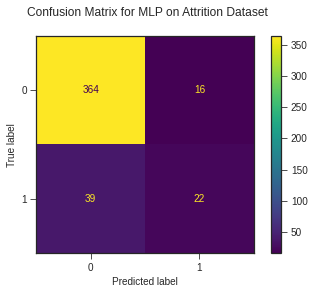

In [117]:
fig=plot_confusion_matrix(mlp_clf, X_test_normalized, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for MLP on Attrition Dataset")
plt.show()

In [118]:
#Plot MLP ROC

0.7972821397756688


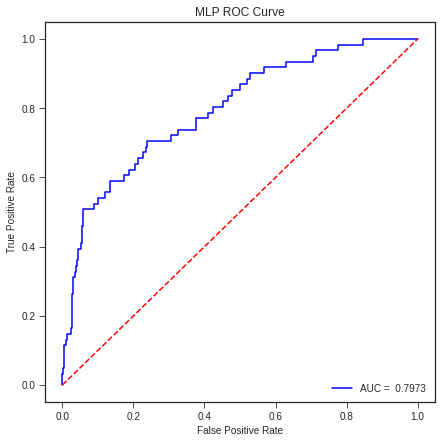

In [119]:
# get probabilities of class membership of test instances
probs_mlp = mlp_clf.predict_proba(X_test_normalized) #which clf?

#get col with probabilities
y_pred_proba = probs_mlp[:,1]

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#define figure size 
plt.figure(figsize=(7,7))

#add title
plt.title('MLP ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'AUC =  ' + str(round(roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,2500,5000,7500,10000,12500,15000,20000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
new_mlp_clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

new_mlp_clf.fit(X_train_normalized, y_train)
print(new_mlp_clf.score(X_train_normalized, y_train))
print(new_mlp_clf.best_params_)

KeyboardInterrupt: 

In [121]:
#MLP improved
new_mlp_clf = MLPClassifier(hidden_layer_sizes=(10), activation= 'relu', max_iter=5000, alpha=0.1,
                    solver='lbfgs', verbose=10, random_state=3,
                    learning_rate_init=.001)

new_mlp_clf.fit(X_train_normalized, y_train)
new_mlp_clf_pred = new_mlp_clf.predict(X_test_normalized)

new_mlp_clf_y_probas=cross_val_predict(new_mlp_clf, X_train_normalized, y_train, method='predict_proba')
new_mlp_clf_y_scores = new_mlp_clf_y_probas[:,1] #score = probability in the positive category
fpr, tpr, threshold=roc_curve(y_train, y_scores_forest)

print("Training set score: %f" % new_mlp_clf.score(X_train_normalized, y_train))
print("Test set score: %f" % new_mlp_clf.score(X_test_normalized, y_test))
print()

#Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, new_mlp_clf_pred),4))
print()

#Classification Report
print("Classification Report:")
print(metrics.classification_report(y_test, new_mlp_clf_pred))

Training set score: 0.987366
Test set score: 0.800454

Accuracy: 0.8005

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       380
           1       0.32      0.39      0.35        61

    accuracy                           0.80       441
   macro avg       0.61      0.63      0.62       441
weighted avg       0.82      0.80      0.81       441



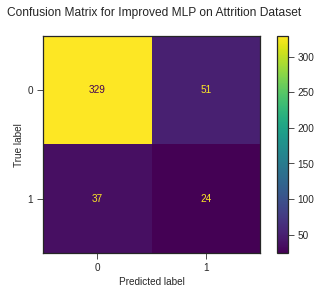

In [122]:
fig=plot_confusion_matrix(new_mlp_clf, X_test_normalized, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for Improved MLP on Attrition Dataset")
plt.show()

0.7168248490077652


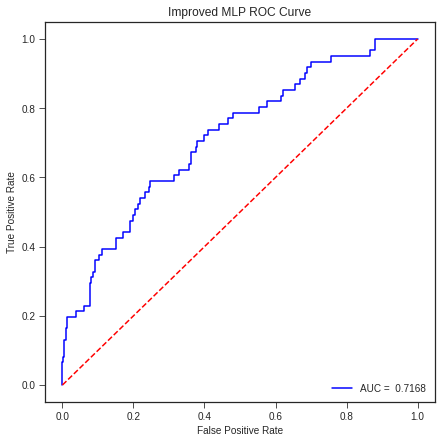

In [123]:
# get probabilities of class membership of test instances
probs_new_mlp = new_mlp_clf.predict_proba(X_test_normalized) #which clf?

#get col with probabilities
y_pred_proba = probs_new_mlp[:,1]

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#define figure size 
plt.figure(figsize=(7,7))

#add title
plt.title('Improved MLP ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'AUC =  ' + str(round(roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

That's all folks!